In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
data = pd.read_csv("../decision-tree-regression-practice/winequality-red.csv")

In [47]:
x = data.iloc[:,:-1].values
x_col = data.iloc[:,:-1]
y = data.iloc[:,-1].values

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
regressor = RandomForestRegressor(n_estimators=2, random_state=0)

In [57]:
regressor = regressor.fit(xtrain, ytrain)

In [58]:
ypred = regressor.predict(xtest)

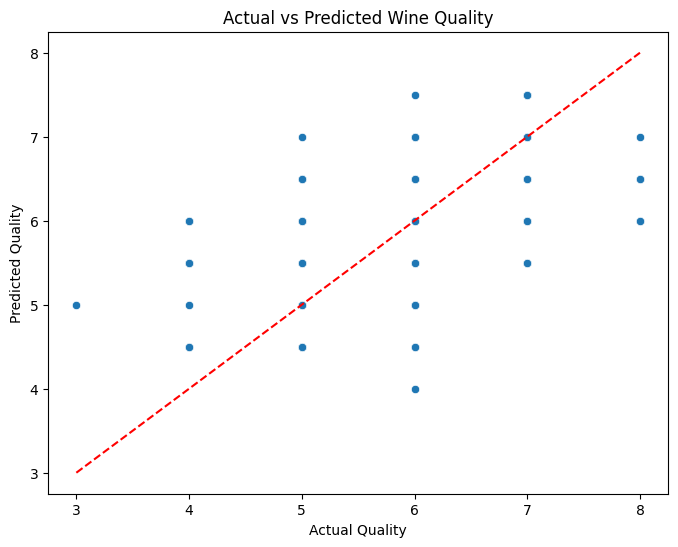

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest, y=ypred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect prediction line
plt.show()

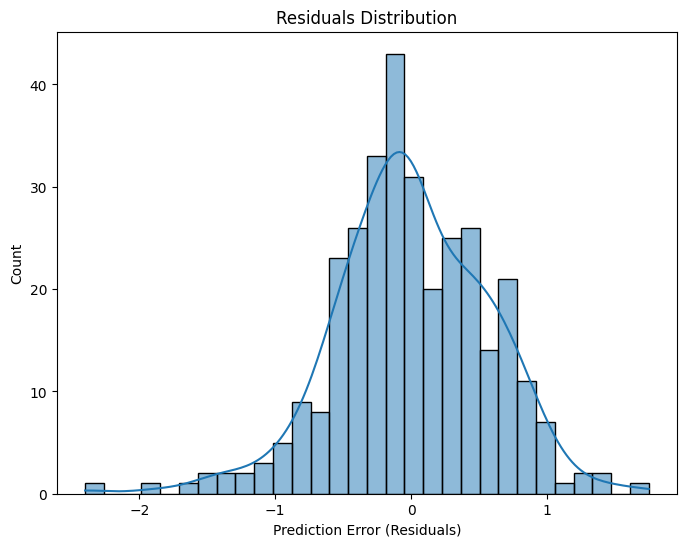

In [53]:
# Residuals
residuals = ytest - ypred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Residuals)")
plt.show()

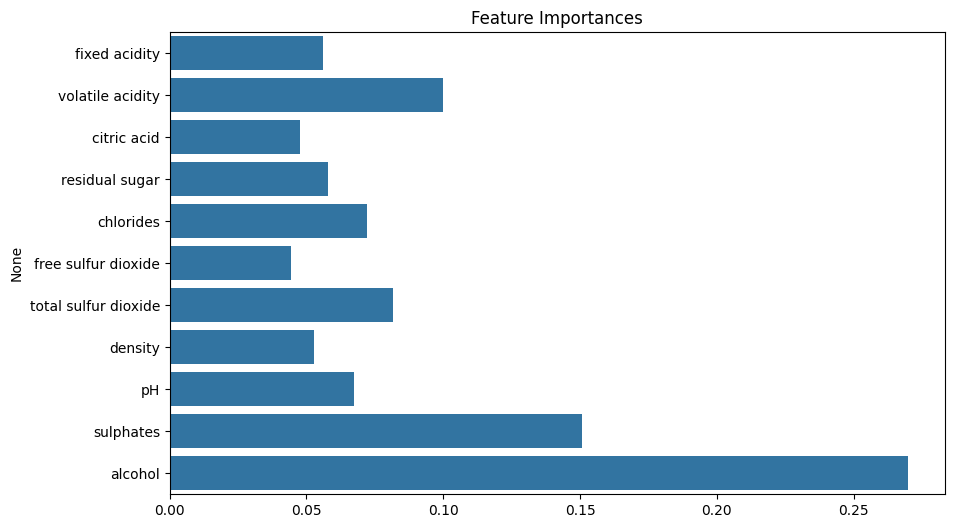

In [54]:
# Feature importance
importances = regressor.feature_importances_
features = x_col.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

In [55]:
print("R² Score:", r2_score(ytest, ypred))
print("RMSE:", mean_squared_error(ytest, ypred))

R² Score: 0.5069143292637368
RMSE: 0.322234375
